![](brain.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import time

# Analyse en composantes principales

## Mise en situation
Je travaille sur un projet de reconnaissance d'images. Chaque image est un tableau de données longueur x largeur x  4 (composantes A, R, G, B - ou à la rigueur x3 pour RGB). Ca fait des gros volumes en entrée et mon algo met beaucoup (trop) de temps.

J'aimerais éliminer les mesures inutiles... Est-ce qu'un algorithme pourrait décider tout seul ce dont j'aurais besoin ?

## Rappels d'algèbre linéaire
### Espace vectoriel $\mathbb{R}^n$

Un espace vectoriel est un ensemble qui (entre autres choses) est stable par combinaison linéaire :
* la somme de deux éléments de l'ensemble est un élément de l'ensemble aussi
* le produit par un scalaire d'un élément en est un autre aussi
* et en combinant les deux propriétés, une combinaison linéaire de plusieurs éléments donne un élément de l'ensemble (d'où "stable par combinaison linéaire")

L'ensemble des vecteurs à $n$ dimensions à valeurs dans $\mathbb{R}$ est un espace vectoriel. La somme de deux vecteurs est un vecteur, le produit par un scalaire est un autre vecteur, etc...

### Base d'un espace vectoriel $\mathbb{R}^n$
Une base d'un tel espace vectoriel est un ensemble de $n$ vecteurs tous "linéairement indépendants" : aucun n'est la combinaison linéaire des autres.

Ex:
* $[0,0,1] [0,1,0] [1,0,0]$ est une base de $\mathbb{R}^3$, la base classique orthonormée
* $[0,0,1] [2,0,0] [1,3,4]$ est une autre base de $\mathbb{R}^3$
* $[0,0,1] [2,1,0] [6,3,4]$ non : le troisième vaut 3x le premier + 4x le second

Etant donnée une base , tout vecteur de l'espace vectoriel peut s'écrire comme une combinaison des vecteurs de cette base.

Ex: le vecteur $[4,6,8]$ dans la base orthornormée devient dans la base $[0,0,1] [2,0,0] [1,3,4]$ le vecteur $[0,1,2]$ : il vaut 0x le premier + 1x le second + 2x le troisième : 0x0+1x2+2x1 = 4, 0x0 + 1x0 + 2x3 = 6 et 0x1 + 0x0 + 2x4 = 8

### Application linéaire
Une application linéaire est une fonction qui transforme un vecteur de l'espace vectoriel en un autre. On la note sous la forme d'une matrice de $\mathbb{R}^{n * n}$. La transformation s'applique via le produit matriciel tel qu'on l'a déja vu.

$I_n$ dénote en général la matrice identité de $\mathbb{R}^n$ : elle ne comporte que des 0, sauf sur la diagonale où c'est des 1. Pour tout vecteur $v$, $I_n.v = v$ (d'où son nom de matrice "identité")

Propriété fondamentale des application linéaires : elles sont stables par combinaison linéaire. Autrement dit $f(\alpha.u + \beta.v) = \alpha.f(u) + \beta.f(v)$

### Rang, noyau, inversibilité
Une matrice est dite inversible si et seulement si l'application linéaire qu'elle représente admet une application inverse, autrement dit, $M$ est inversible s'il existe $M^{-1}$ telle que $M.u = v$ et $M^{-1}.v = u$ pour tous vecteurs $u$ et $v$. L'application est une bijection dans ce cas.

Soit $u$ un vecteur **non-nul** tel que $M.u = 0$, le vecteur nul. De par la stabilité des applications par combinaisons linéaires, $M.(\lambda.u) = \lambda.0 = 0$ et donc cette application n'est pas inversible : ce n'est pas une bijection, deux vecteurs ont la même image et par conséquent on ne peut pas remonter de cette image à son antécédent, il n'est pas unique...

On appelle "noyau" l'ensemble de tels vecteurs $u$ qui donnent le vecteur nul une fois multipliés par $M$. Le noyau est un sous-espace vectoriel de $\mathbb{R}^n$.

Le "rang" d'une matrice est la dimension de l'espace qui reste, en quelque sorte : $n-dim(\mathcal{K})$, $\mathcal{K}$ étant le noyau (pour _Kernel_) et dim(...) sa dimension. C'est le _théoreme du rang_.

Le rang d'une application inversible de $\mathbb{R}^n$ est donc $n$.

### Déterminant
Le déterminant d'une matrice dans $\mathbb{R}^{n*n}$ est un réel, qu'on calcule récursivement de la manière suivante :
* On part de la première ligne
* on parcourt chaque élément $M_{1,j}$ sur la j-ème colonne
  * on calcule le déterminant $det_j$ de la matrice privée de sa première ligne et de sa j-ème colonne
  * le déterminant d'une matrice 1x1 est la valeur de son unique élément
* le déterminant vaut $M_{1,1} * det_1 - M_{1,2} * det_2 + - M_{1,3} * det_3 - ... $ (alternance des plus et des moins)

Exemple : le déterminant de 
$\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{bmatrix}$
vaut 1 x ( 5 x (9) - 6 x (8) ) - 2 x (4 x (9) - 6 x (7) ) + 3 x ( 4 x (8) - 5 x (7) ) = -3 +12 -9 = 0

Moyennant un principe similaire, on peut le faire par colonnes plutôt que par ligne, et pas forcément la première d'ailleurs.

Propriété du déterminant : M est inversible si et seulement si son déterminant est non nul. La matrice ci-dessus n'est pas inversible : on vérifiera aussi que le vecteur $[1,2,1]$ fait partie de son noyau.

### Valeurs propres et vecteurs propres
Soit $M$ une matrice, soit $\lambda$ un scalaire tel qu'il existe un vecteur $u$ avec $M.u = \lambda.u$.

On appelle ce scalaire une _valeur propre_. Pour trouver un tel $\lambda$, on applique la logique suivante : 

$M.u = \lambda.u \\
M.u - \lambda.u = 0 \\
(M - \lambda.I_n).u = 0$

Donc $(M - \lambda.I_n)$ n'est pas inversible : son noyau comporte au moins le vecteur $u$. Par conséquent son déterminant est nul.

On note $P(\lambda) = det(M - \lambda.I_n)$ le déterminant de cette matrice, en fonction de $\lambda$ : c'est un polynôme de degré $n$, dont les racines sont les valeurs propres de $M$ (puisque pour ces valeurs, on a un déterminant nul, alors en remontant le fil on a une valeur propre). On l'appelle le _polynome caractéristique_.

Les vecteurs $u$ qui correspondent sont appellés eux les _vecteurs propres_, et dans la littérature non francophone on parle de _eigenvalues_ et _eigenvectors_ (l'anglais ayant repris les mots allemands).

### Diagonalisation
Toute matrice dans $\mathbb{R}^n$ qui admet $n$ valeurs propres est dite diagonalisable. On peut, via un changement de base, la représenter sous la forme d'une matrice dont tous les termes sont nuls, sauf sur la diagonale où on retrouve les valeurs propres.

Cette base est constituée de vecteurs propres. Son avantage est de présenter l'application linéaire sous une forme plus simple.

Exemple :
* on considère la base "classique" $[1,0] [0,1]$ (tout point du plan correspond à une abscisse et une ordonnée dans le repère orthonormé).
* on considère la matrice $M$ suivante : $\begin{bmatrix}
50 & -49\\
-49 & 50
\end{bmatrix}$
* On peut vérifier que son polynôme caractéristique est $X^2-100X+99$, qui admet deux racines : 1 et 99
* On peut donc écrire, dans une autre base, $M$ comme étant la matrice $\begin{bmatrix}
99 & 0\\
0 & 1
\end{bmatrix}$

Avantage de cette écriture : la première matrice ne nous parle pas beaucoup. Sur la seconde, on voit bien par contre que dans la "bonne" base, 99% de la transformation passe sur une dimension et seulement 1% sur l'autre.

Plus précisément, tout vecteur $z$ peut s'écrire $z = \alpha.u + \beta.v$ avec $u,v$ une base de vecteurs propres : $f(z) = 99.\alpha.u + 1.\beta.v$. Si en plus on s'assure que les vecteurs propres aient tous la même norme (base _normée_) alors $99.\alpha.u$ est une bonne approximation de $f(z)$

Ne prendre en compte que la première dimension et ignorer la seconde permet donc une opération simple mais efficace : 
* on perd le caractère inversible, toutefois, on a une approximation à 99% du résultat, c'est pas mal
* on a réduit le nombre de dimensions nécessaires

## Analyse en composantes principales

J'aurais pu commencer ici directement, mais je n'aime pas les algorithmes "magiques". Au moins, on comprend un peu mieux ce qu'on fait.

Le principe de l'analyse en composantes principales (PCA en anglais) est le suivant :
* On dispose de nos données d'entrainement $X$ ($m$ lignes, $n$ colonnes)
* On calcule la matrice de covariance (cf. hier) $\Sigma = \frac{X^T.X}{m}$
* On calcule les valeurs propres et vecteurs propres de $\Sigma$
* On ne garde que les valeurs propres qui représentent un certain pourcentage du total (mettons 95% : on parle alors de 95% de variance conservée), et les vecteurs associés
* On obtient donc une transformation de $X$ en une matrice plus petite ($m$ lignes, mais moins de colonnes)

Dans notre exemple plus haut, on conserve 99% de l'exemple, en divisant les dimensions par 2 !

Intuitivement, voilà ce qu'on fait : je calcule le prix d'une voiture d'occasion, et je dispose d'un tas d'informations dont :
* le kilométrage en km et la même information en miles : dans ce cas, on peut montrer que la matrice de covariance admet une valeur propre de 0 (ou presque, erreur d'arrondi...), en éliminant cette dimension on ne perd pas d'information et le modèle se fiche de savoir si le pays respecte le système international ou pas
* le kilométrage et le niveau d'usure du moteur : là, la corrélation existe mais elle est un peu moins visible. Par contre, la matrice de covariance aura une valeur propre assez faible sur la corrélation de ces deux mesures. Si on l'élimine, le modèle pourra probablement se débrouiller. 

Le PCA, c'est juste ça : transformer des exemples à $n$ dimensions en exemples à $n' < n$ dimensions, tout en étant plutôt proche de l'original. Et qui dit moins de dimensions dit moins de paramètres à optimiser dans mon modèle.


## Un exemple compréhensible par un humain 😁

Parfois une image en niveau de gris suffit pour reconnaitre un modèle. Un pixel gris a les mêmes composantes R, G, B (donc 3 données).
* je ne peux pas simplement garder R et virer G et B : je perds trop d'information sur tout ce qui n'est pas rouge !
* par contre $gray = 0.30*R + 0.59*G + 0.11*B$ est une formule qui donne un niveau de gris.

Et donc, je peux tranformer mes vecteurs dans une base via $M = \begin{bmatrix}
0.3 & 0.59 & 0.11\\
0 & 0 & 0\\
0 & 0 & 0
\end{bmatrix}$ pour avoir des exemples 3 fois plus petits : $M.\begin{bmatrix}A\\
B\\
C
\end{bmatrix} = \begin{bmatrix}gray\\
0\\
0
\end{bmatrix}$, sur lequel je ne garde que la première valeur bien entendu.

Le PCA, c'est pareil sauf que le système va trouver tout seul ce qui est utile et ce qui ne l'est pas.

### Un algorithme non supervisé
Avec cette analyse, on utilise des propriétés mathématiques pour "apprendre" quelles sont les composantes importantes et quelles sont celles qu'on peut ignorer.

Mais on n'a pas entrainé pour cela un modèle à reconnaitre des bonnes et des mauvaises composantes : c'est du non-supervisé.

## Retour à la mise en situation
### Chargement des données

On va repartir des chiffres manuscrits de la semaine dernière (épisodes 9 & 10), des images de 28x28 en noir et blanc : 728 dimensions...

In [2]:
def load(file): 
    data = np.load(file)
    return data['x'], data['y']

x_train, y_train = load('data/d09_train_data.npz')
x_test , y_test  = load('data/d09_test_data.npz')

m,n = x_train.shape

print('%i training samples loaded of size %i' % (m, n))
print('%i test samples loaded' %(x_test.shape[0]))

60000 training samples loaded of size 784
10000 test samples loaded


In [3]:
covariance = np.dot(x_train.T, x_train) / m
print("Covariance matrix dimensions : " + str(covariance.shape))

Covariance matrix dimensions : (784, 784)


In [4]:
# La méthode magique : SVD (singular value decomposition)
# Pour l'essentiel : u contient les vecteurs propres, s contient les valeurs propres, dans l'ordre décroissant
u, s, v = np.linalg.svd(covariance)

In [5]:
# Limite le  total des valeurs propres par un ratio entre 0 et 1
# cumsum : somme cumulée
def pca(u, s, ratio):
    return u[:,np.cumsum(s)/np.sum(s) < ratio].T

# Nouvelle base, avec 95% de l'information conservée
u_reduced = pca(u, s, 0.95)
print("New dimension : %i instead of %i (%i%% less)" %(u_reduced.shape[0], n, 100-100*u_reduced.shape[0]/n))

New dimension : 102 instead of 784 (86% less)


In [6]:
x_train_reduced = np.dot(x_train, u_reduced.T)
print('New train set dimensions : ' + str(x_train_reduced.shape))

New train set dimensions : (60000, 102)


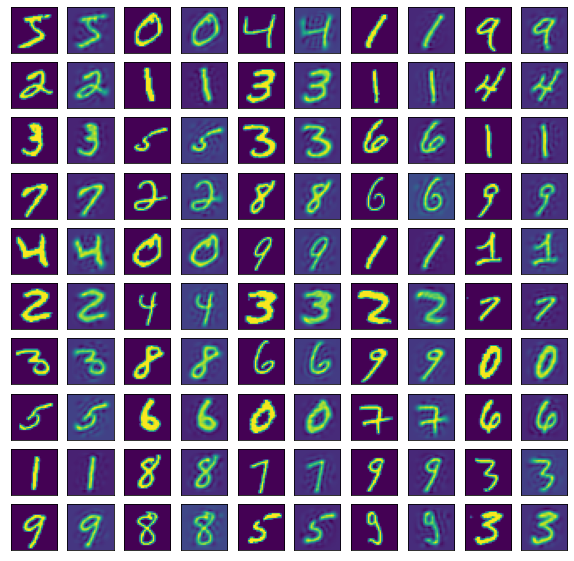

In [7]:
# On "regonfle" une partie de notre jeu de données pour voir ce qu'on a "perdu"
x_train_inflate = np.dot(x_train_reduced[:50,], u_reduced)
fig = plot.figure(figsize=(10,10))

for i in range(50):
    axes = fig.add_subplot(10,10,i*2+1)
    axes.xaxis.set_visible(False)
    axes.yaxis.set_visible(False)
    plot.imshow(x_train[i,:].reshape(28,28))
    axes = fig.add_subplot(10,10,i*2 + 2)
    axes.xaxis.set_visible(False)
    axes.yaxis.set_visible(False)
    plot.imshow(x_train_inflate[i,:].reshape(28,28))

Les images ci-dessus montrent comment, en gardant 95% de la variance - ce qui se traduit par une grande similitude - on peut se débarasser de beaucoup de dimensions. Tout est une question de base. On va refactoriser ça pour avoir facilement une version à 90, 85 ou 75%

New dimension : 52 instead of 784 (93% less)


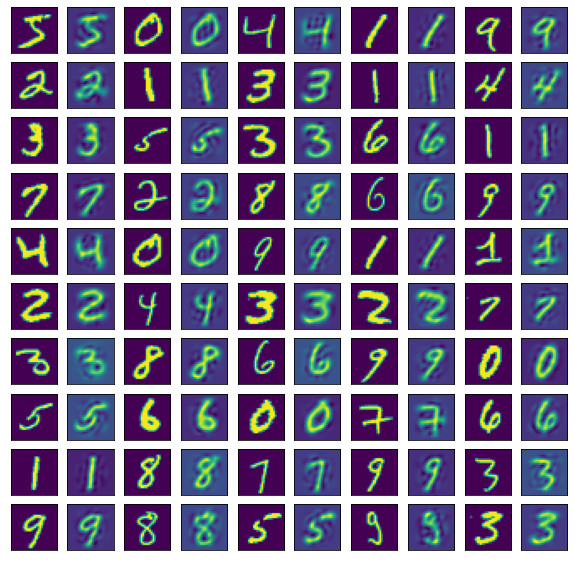

In [8]:
def reduce(x_train, u, s, ratio):
    u_reduced = pca(u, s, ratio)
    print("New dimension : %i instead of %i (%i%% less)" %(u_reduced.shape[0], n, 100-100*u_reduced.shape[0]/n))
    x_train_reduced = np.dot(x_train, u_reduced.T)
    x_train_inflate = np.dot(x_train_reduced[:50,:], u_reduced)
    fig = plot.figure(figsize=(10,10))

    for i in range(50):
        axes = fig.add_subplot(10,10,i*2+1)
        axes.xaxis.set_visible(False)
        axes.yaxis.set_visible(False)
        plot.imshow(x_train[i,:].reshape(28,28))
        axes = fig.add_subplot(10,10,i*2 + 2)
        axes.xaxis.set_visible(False)
        axes.yaxis.set_visible(False)
        plot.imshow(x_train_inflate[i,:].reshape(28,28))
    
reduce(x_train, u, s, 0.90)

New dimension : 33 instead of 784 (95% less)


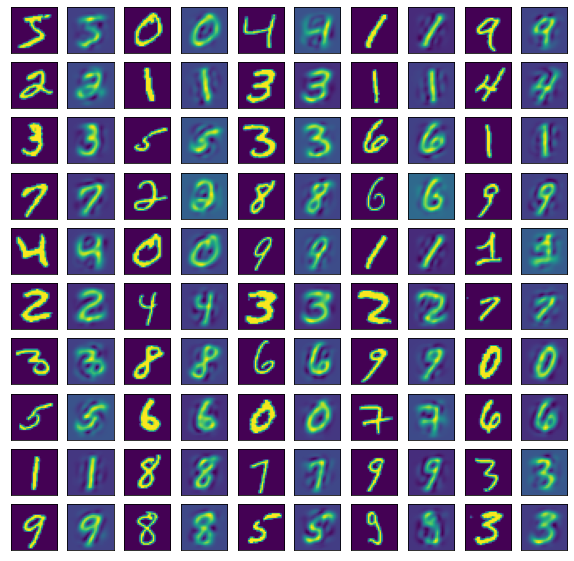

In [9]:
reduce(x_train, u, s, 0.85)

New dimension : 22 instead of 784 (97% less)


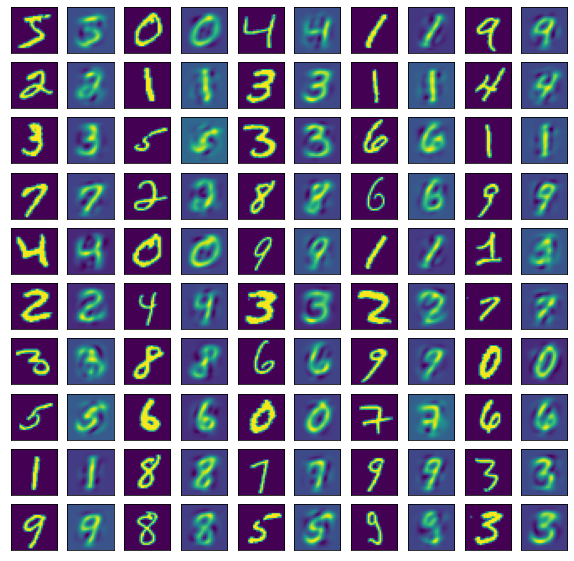

In [10]:
reduce(x_train, u, s, 0.80)

Pour 75% ça peut faire trop, c'est pas hyper lisible... (vous pourrez tester) mais pour 80% par exemple, on peut faire tenir chacun de nos exemples sur 22 octets - et en plus si on le convertit en pur noir et blanc ça peut faire 22 bits soit moins de 3 octets et moins de 190ko, 1.5Mo en niveau de gris,  pour toute la base train+test alors que la source, zippée, fait 20M ! - et malgré ça, ça reste plutôt bien lisible !

Après, y'a plus qu'à tester sur un algo classique pour voir ce que ça donne :)

In [11]:
x_test_small = x_test[:500,:]
y_test_small = y_test[:500,:]

def k_nearest_neighbours(x_train, y_train, x, k, class_count):
    m = x.shape[0]
    result = np.zeros((m, class_count))
    
    for i in range(m):
        # distances euclidiennes
        dist = np.sum((x_train - x[i,:])**2, axis = 1)
        # On sort les indices des k plus proces
        k_nearest = dist.argsort()[:k]
        # On trouve les classes correspondantes
        classes = y_train[k_nearest,0].reshape(-1).astype(int)
        # Et on en extrait le principal élément
        counts = np.bincount(classes) / k
        result[i,:counts.shape[0]] = counts
    return result

start_time = time.time()
test_results = np.argmax(k_nearest_neighbours(x_train, y_train, x_test_small, k = 10, class_count = 10), axis = 1).reshape(-1, 1)
print('Accuracy on test set (k = 10): %f - %f seconds' % (np.sum(test_results == y_test_small)/y_test_small.shape[0], time.time() - start_time))

Accuracy on test set (k = 10): 0.956000 - 217.043940 seconds


In [12]:
u_reduced = pca(u, s, 0.80)
x_train_reduced = np.dot(x_train, u_reduced.T)
x_test_reduced = np.dot(x_test_small, u_reduced.T)

start_time = time.time()
test_results = np.argmax(k_nearest_neighbours(x_train_reduced, y_train, x_test_reduced, k = 10, class_count = 10), axis = 1).reshape(-1, 1)
print('Accuracy on reduced test set (k = 10): %f - %f seconds' % (np.sum(test_results == y_test_small)/y_test_small.shape[0], time.time() - start_time))

Accuracy on reduced test set (k = 10): 0.966000 - 8.274887 seconds


J'ai choisi les "K plus proches voisins" parce que la durée du test dépend énormément du nombre de mesures (pour calculer la norme). Non seulement on déboite en terme de durée, mais en plus on fait mieux en test !

Alors sur ce dernier point, il ne faut pas s'enflammer non plus : d'abord c'est un peu un hasard, mais surtout se servir de PCA pour prévenir l'overfit, c'est pas une bonne idée.
* Supprimer des mesures peut aider à réduire l'overfit (cf. jour 7 : moins de mesures = moins de liberté pour le modèle)
* Comprimer les données ne supprime pas de mesure à proprement parler, ça les réagence d'une façon optimale - et on perd effectivement quelques informations, mais uniquement parce qu'elles étaient, peu ou prou, des combinaisons linéaires les unes par rapport aux autres. Mais ça n'est pas "supprimer des libertés" que de virer de la redondance.

Dans le cadre d'une descente de gradient, on peut s'en servir pour :
* réduire le nombre de paramètres à ajuster, donc ça va plus vite
* réduire la taille d'un sample, et donc pouvoir faire, à taille équivalente, des minibatchs plus importants qui tiennent toujours en mémoire (donc moins d'itérations pour une époque complète, d'où convergence plus rapide aussi)